# 1 PyTorch 基础部分

In [ ]:
import torch
import numpy as np

In [3]:
np_data=np.arange(6).reshape((2,3))
torch_data=torch.from_numpy(np_data)
tensor2array=torch_data.numpy()

print(
    '\nnumpy array:\n',np_data,
    '\ntorch array:\n',torch_data,
    '\ntensor to numpy:\n',tensor2array
)


numpy array:
 [[0 1 2]
 [3 4 5]] 
torch array:
 tensor([[0, 1, 2],
        [3, 4, 5]]) 
tensor to numpy:
 [[0 1 2]
 [3 4 5]]


In [4]:
data=[[1,2],[3,4]]
tensor=torch.FloatTensor(data)

print("matrix multiplication",
    "\nnumpy: ",np.matmul(data,data),
    "\ntorch: ",torch.mm(tensor,tensor)
)

matrix multiplication 
numpy:  [[ 7 10]
 [15 22]] 
torch:  tensor([[ 7., 10.],
        [15., 22.]])


In [5]:
from torch.autograd import Variable

tensor=torch.FloatTensor([[1,2],[3,4]])
variable=Variable(tensor,requires_grad=True)

print(tensor)
print(variable)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [6]:
t_out=torch.mean(tensor*tensor)
v_out=torch.mean(variable*variable)

print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [7]:
v_out.backward()

print(variable.grad)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [10]:
# 激励函数
import torch
import torch.nn.functional as F # 所有的激励函数
from torch.autograd import Variable
import matplotlib.pyplot as plt

# 构造一些数据
x=torch.linspace(-5,5,200) # x data (tensor), shape=(100,1)
x=Variable(x)

# 生成不同的激励函数
x_np=x.data.numpy() # 换成numpy array，绘图的时候使用


# 几种常用的激励函数
y_relu=F.relu(x).data.numpy()
y_sigmoid=F.sigmoid(x).data.numpy()
y_tanh=F.tanh(x).data.numpy()
y_softplus=F.softplus(x).data.numpy()


/home/fujie/miniconda3/envs/myenv/lib/python3.9/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/fujie/miniconda3/envs/myenv/lib/python3.9/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


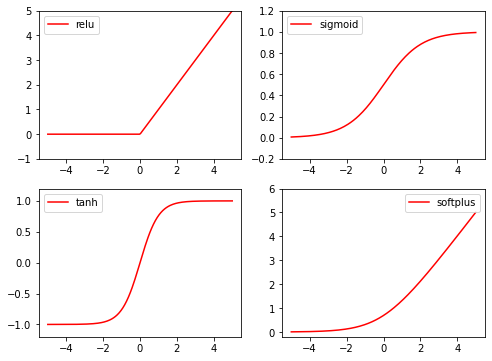

In [11]:
# 绘图
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()



# 2 使用PyTorch建造第一个神经网络

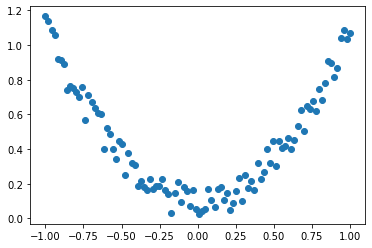

In [13]:
# 构建数据集
import torch
import matplotlib.pyplot as plt

x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1) # x data (tensor), shape=(100,1)
y=x.pow(2)+0.2*torch.rand(x.size()) # noise y data(tensor), shape=(100,1)

# 绘图
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()